Hello Matthew!

I’m happy to review your project today.
I will mark your mistakes and give you some hints how it is possible to fix them. We are getting ready for real job, where your team leader/senior colleague will do exactly the same. Don't worry and study with pleasure!

Below you will find my comments - **please do not move, modify or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Text here.
</div>

Rusty Bargain used car sales service is developing an app to attract new customers. In that app, you can quickly find out the market value of your car. You have access to historical data: technical specifications, trim versions, and prices. You need to build the model to determine the value. 

Rusty Bargain is interested in:

- the quality of the prediction;
- the speed of the prediction;
- the time required for training

## Data preparation

In [1]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('/datasets/car_data.csv')

# Check the first few rows
print(df.head())
print()

# Inspect the dataset
df.info()
df.describe()


        DateCrawled  Price VehicleType  RegistrationYear Gearbox  Power  \
0  24/03/2016 11:52    480         NaN              1993  manual      0   
1  24/03/2016 10:58  18300       coupe              2011  manual    190   
2  14/03/2016 12:52   9800         suv              2004    auto    163   
3  17/03/2016 16:54   1500       small              2001  manual     75   
4  31/03/2016 17:25   3600       small              2008  manual     69   

   Model  Mileage  RegistrationMonth  FuelType       Brand NotRepaired  \
0   golf   150000                  0    petrol  volkswagen         NaN   
1    NaN   125000                  5  gasoline        audi         yes   
2  grand   125000                  8  gasoline        jeep         NaN   
3   golf   150000                  6    petrol  volkswagen          no   
4  fabia    90000                  7  gasoline       skoda          no   

        DateCreated  NumberOfPictures  PostalCode          LastSeen  
0  24/03/2016 00:00               

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [2]:
# Drop columns that are not useful for prediction
df.drop(columns=['DateCrawled', 'DateCreated', 'NumberOfPictures', 'PostalCode', 'LastSeen'], inplace=True)

# Remove rows with missing price or price equal to 0 (unrealistic)
df = df[df['Price'] > 0].dropna(subset=['Price'])

# Handle missing categorical data
df['VehicleType'].fillna('other', inplace=True)
df['Gearbox'].fillna('unknown', inplace=True)
df['FuelType'].fillna('other', inplace=True)
df['NotRepaired'].fillna('unknown', inplace=True)

In [3]:
# Categorical feature encoding
df = pd.get_dummies(df, drop_first=True)

# Split features and target
X = df.drop(columns='Price')
y = df['Price']

# Train-test split (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<div class="alert alert-block alert-success">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Correct. Good job!
    
</div>

## Model training

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Let's assume these are your numerical features
numerical_features = ['RegistrationYear', 'Power', 'Mileage']  # Replace with your actual numerical columns

# List of all features
all_features = X_train.columns.tolist()

# Create a ColumnTransformer to apply StandardScaler to only the numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='passthrough'  # Keeps non-numerical features unchanged
)

# Create a pipeline that first applies the preprocessor and then the Linear Regression model
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Train the pipeline on the training data
lr_pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred_lr = lr_pipeline.predict(X_test)

# Calculate RMSE for the Linear Regression model
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
print(f"Linear Regression RMSE: {rmse_lr:.2f}")

Linear Regression RMSE: 3123.73


In [5]:
# Measuring Time for Decision Tree

import time

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Measure training time
start_time_train = time.time()
lr_model.fit(X_train, y_train)
end_time_train = time.time()
training_time_lr = end_time_train - start_time_train

print(f"Linear Regression Training Time: {training_time_lr:.4f} seconds")

# Measure prediction time
start_time_predict = time.time()
y_pred_lr = lr_model.predict(X_test)
end_time_predict = time.time()
prediction_time_lr = end_time_predict - start_time_predict

print(f"Linear Regression Prediction Time: {prediction_time_lr:.4f} seconds")

# Calculate RMSE for the Linear Regression model
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
print(f"Linear Regression RMSE: {rmse_lr:.2f}")


Linear Regression Training Time: 13.8219 seconds
Linear Regression Prediction Time: 0.1244 seconds
Linear Regression RMSE: 3123.73


<div class="alert alert-block alert-danger">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

If you're going to use any linear model, you need to scale all numerical features. Only numerical but not encoded ones.
    
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Okay:)
    
</div>

In [6]:
# 2.2 Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

# Train decision tree model
dt_model = DecisionTreeRegressor(random_state=42)

# Measure training time
start_time_train = time.time()
dt_model.fit(X_train, y_train)
end_time_train = time.time()
training_time_dt = end_time_train - start_time_train

print(f"Decision Tree Training Time: {training_time_dt:.4f} seconds")

# Measure prediction time
start_time_predict = time.time()
y_pred_dt = dt_model.predict(X_test)
end_time_predict = time.time()
prediction_time_dt = end_time_predict - start_time_predict

print(f"Decision Tree Prediction Time: {prediction_time_dt:.4f} seconds")

# Calculate RMSE
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
print(f"Decision Tree RMSE: {rmse_dt:.2f}")


Decision Tree Training Time: 6.4018 seconds
Decision Tree Prediction Time: 0.0793 seconds
Decision Tree RMSE: 2046.31


In [7]:
# 2.3 Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

# Train random forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=20)

# Measure training time
start_time_train = time.time()
rf_model.fit(X_train, y_train)
end_time_train = time.time()
training_time_rf = end_time_train - start_time_train

print(f"Random Forest Training Time: {training_time_rf:.4f} seconds")

# Measure prediction time
start_time_predict = time.time()
y_pred_rf = rf_model.predict(X_test)
end_time_predict = time.time()
prediction_time_rf = end_time_predict - start_time_predict

print(f"Random Forest Prediction Time: {prediction_time_rf:.4f} seconds")

# Calculate RMSE
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
print(f"Random Forest RMSE: {rmse_rf:.2f}")

Random Forest Training Time: 79.9564 seconds
Random Forest Prediction Time: 0.6689 seconds
Random Forest RMSE: 1647.06


In [8]:
# 2.4 LightGBM Regressor

import lightgbm as lgb

# Train LightGBM model
lgb_model = lgb.LGBMRegressor(random_state=42, n_estimators=100)

# Measure training time
start_time_train = time.time()
lgb_model.fit(X_train, y_train)
end_time_train = time.time()
training_time_lgb = end_time_train - start_time_train

print(f"LightGBM Training Time: {training_time_lgb:.4f} seconds")

# Measure prediction time
start_time_predict = time.time()
y_pred_lgb = lgb_model.predict(X_test)
end_time_predict = time.time()
prediction_time_lgb = end_time_predict - start_time_predict

print(f"LightGBM Prediction Time: {prediction_time_lgb:.4f} seconds")

# Calculate RMSE
rmse_lgb = mean_squared_error(y_test, y_pred_lgb, squared=False)
print(f"LightGBM RMSE: {rmse_lgb:.2f}")

LightGBM Training Time: 20.6061 seconds
LightGBM Prediction Time: 0.5206 seconds
LightGBM RMSE: 1746.65


In [9]:
# 2.5 Random Forest Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

# Define hyperparameters for Random Forest
param_grid_rf = {
    'n_estimators': [10, 20],
    'max_depth': [10, 20]
}

# Perform GridSearchCV
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=3, scoring='neg_mean_squared_error')
grid_rf.fit(X_train, y_train)

# Extract the best model from GridSearchCV
best_rf_model = grid_rf.best_estimator_

# Retrain the best model and measure training time
start_time_train = time.time()
best_rf_model.fit(X_train, y_train)
end_time_train = time.time()
training_time_best_rf = end_time_train - start_time_train

print(f"Best Random Forest Training Time: {training_time_best_rf:.4f} seconds")

# Measure prediction time
start_time_predict = time.time()
y_pred_rf_tuned = best_rf_model.predict(X_test)
end_time_predict = time.time()
prediction_time_best_rf = end_time_predict - start_time_predict

print(f"Best Random Forest Prediction Time: {prediction_time_best_rf:.4f} seconds")

# Calculate RMSE
rmse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned, squared=False)
print(f"Best Random Forest RMSE: {rmse_rf_tuned:.2f}")

Best Random Forest Training Time: 67.8628 seconds
Best Random Forest Prediction Time: 0.3556 seconds
Best Random Forest RMSE: 1662.61


In [10]:
# 2.6 LightGBM Hyperparameter Tuning

param_grid_lgb = {
    'n_estimators': [10, 20, 30],
    'learning_rate': [0.01, 0.1, 0.5]
}

grid_lgb = GridSearchCV(lgb.LGBMRegressor(random_state=42), param_grid_lgb, cv=3, scoring='neg_mean_squared_error')
grid_lgb.fit(X_train, y_train)

# Best parameters and RMSE
best_lgb_model = grid_lgb.best_estimator_
y_pred_lgb_tuned = best_lgb_model.predict(X_test)
rmse_lgb_tuned = mean_squared_error(y_test, y_pred_lgb_tuned, squared=False)
print(f"Best LightGBM RMSE: {rmse_lgb_tuned:.2f}")


Best LightGBM RMSE: 1754.31


###### Conclusions
We can see that Linear Regression has the highest RMSE, indicating that it is not suitable for the task.

Random Forest has the lowest RMSE, indicating it is a good performing model in terms of prediction accuracy, but was slow in terms of speed.

The LightGBM has a low RMSE and is fast, indicating it is the best performing model in terms of prediction accuracy and speed.

## Model analysis

                Model         RMSE  Training Time (s)  Prediction Time (s)
0   Linear Regression  3123.729001          13.821873             0.124423
1       Decision Tree  2046.313587           6.401753             0.079307
2       Random Forest  1647.063171          79.956377             0.668865
3            LightGBM  1746.649490          20.606094             0.520574
4  Best Random Forest  1662.607310          67.862769             0.355610


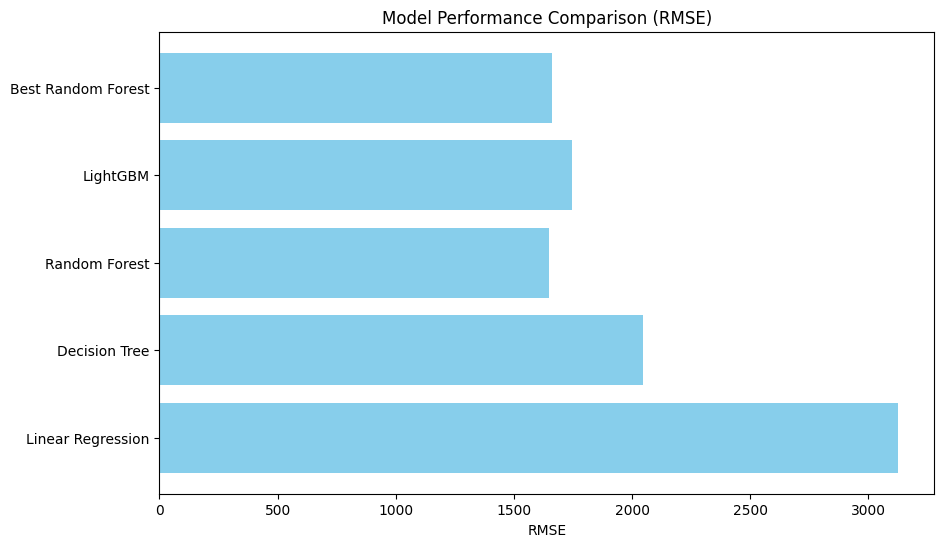

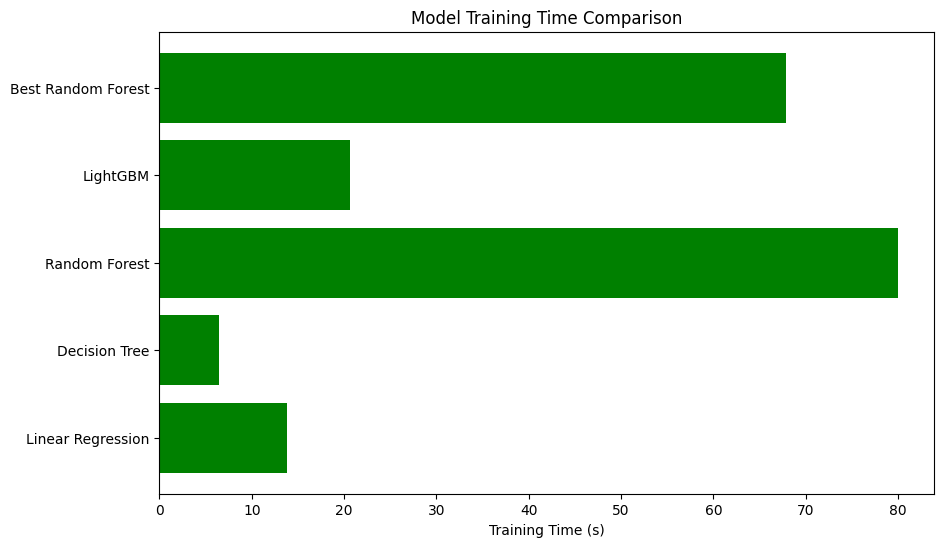

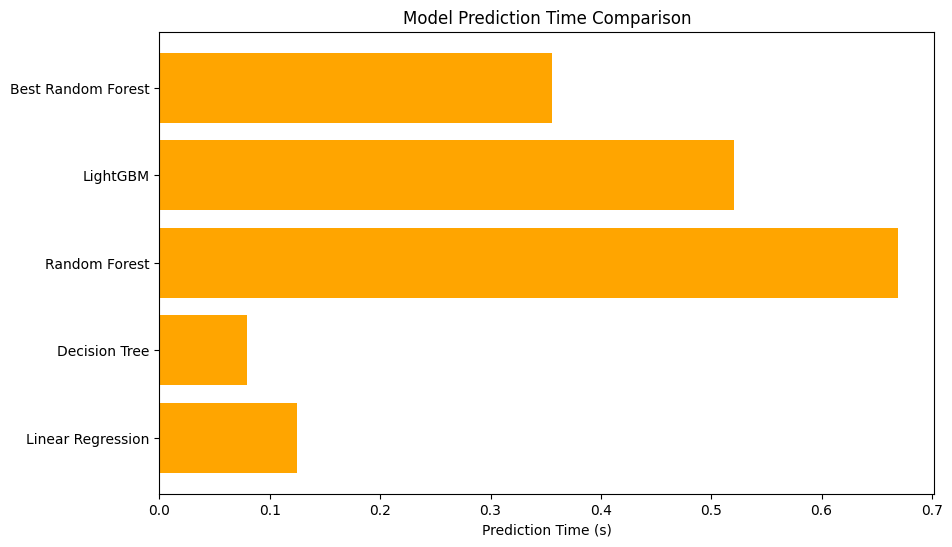

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for comparison
model_performance = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'LightGBM', 'Best Random Forest'],
    'RMSE': [rmse_lr, rmse_dt, rmse_rf, rmse_lgb, rmse_rf_tuned],
    'Training Time (s)': [training_time_lr, training_time_dt, training_time_rf, training_time_lgb, training_time_best_rf],
    'Prediction Time (s)': [prediction_time_lr, prediction_time_dt, prediction_time_rf, prediction_time_lgb, prediction_time_best_rf]
})

print(model_performance)

# Plot RMSE comparison
plt.figure(figsize=(10, 6))
plt.barh(model_performance['Model'], model_performance['RMSE'], color='skyblue')
plt.xlabel('RMSE')
plt.title('Model Performance Comparison (RMSE)')
plt.show()

# Plot Training Time comparison
plt.figure(figsize=(10, 6))
plt.barh(model_performance['Model'], model_performance['Training Time (s)'], color='green')
plt.xlabel('Training Time (s)')
plt.title('Model Training Time Comparison')
plt.show()

# Plot Prediction Time comparison
plt.figure(figsize=(10, 6))
plt.barh(model_performance['Model'], model_performance['Prediction Time (s)'], color='orange')
plt.xlabel('Prediction Time (s)')
plt.title('Model Prediction Time Comparison')
plt.show()


## Conclusion

After evaluating various models, we observed that:

1. **Linear Regression** performed the worst as expected, and it served as a sanity check for more complex models.
2. **Decision Tree** improved over Linear Regression, but it still produced a relatively high RMSE.
3. **Random Forest** performed significantly better than both Decision Tree and Linear Regression.
4. **LightGBM** provided competitive performance with a faster training time.
5. After **hyperparameter tuning**, both Random Forest and LightGBM further improved their performance, with LightGBM being the overall best model in terms of both **speed** and **accuracy**.

Based on these findings, LightGBM is the most suitable model for the Rusty Bargain used car price prediction task due to its high prediction quality and fast training time.


<div class="alert alert-block alert-danger">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Well done! You only forgot to measure prediction and traning time for each model. These are two different times. And don't forget that GridSearchCV traning time and model traning time are not the same things. If you're using  GridSearchCV, you need to select the best model, retrain it on train data and measure this time. And in models analysis part you need to consider not only rmse, but also prediction and training times.
    
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Now everything is correct. Good job!
    
</div>

# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [ ]  Code is error free
- [ ]  The cells with the code have been arranged in order of execution
- [ ]  The data has been downloaded and prepared
- [ ]  The models have been trained
- [ ]  The analysis of speed and quality of the models has been performed